In [91]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [92]:
data = pd.read_csv("data.csv")
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
    x   y
0   1   7
1   2   9
2   3  11
3   4  13
4   5  15
5   6  17
6   7  19
7   8  21
8   9  23
9  10  25


In [93]:
x = data.loc[:,'x']
print(x)
print(type(x))

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: x, dtype: int64
<class 'pandas.core.series.Series'>


In [94]:
y = data.loc[:,'y']
c = data.loc[:,'x'][y > 60]
print(c)

Series([], Name: x, dtype: int64)


mse= 3.1554436208840474e-31
r2 = 1.0


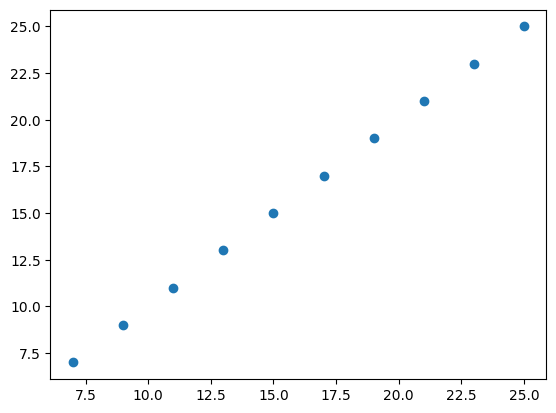

In [95]:
from sklearn.linear_model import LinearRegression
x_array = np.array(x)
x_array = x_array.reshape(-1,1)
y_array = np.array(y)
lr_model = LinearRegression()
lr_model.fit(x_array,y_array)

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
y_new = lr_model.predict(x_array)
plt.scatter(y,y_new)

mse = mean_squared_error(y,y_new)
r2 = r2_score(y,y_new)
print('mse=',mse)
print('r2 =',r2)

In [28]:
print(lr_model.coef_)
print(lr_model.intercept_)

[2.]
4.999999999999998


下载数据的函数

In [4]:
import os
import tarfile
import urllib
from zipfile import ZipFile
import pandas as pd

In [27]:
DOWNLOAD_ROOT = "https://archive.ics.uci.edu/static/public/109/wine.zip"
path = 'datasets/wine/'

def fetch_and_extract_zip_data(path_,url_):
    os.makedirs(path_,exist_ok = True)
    save_path = os.path.join(path_ + 'wine.zip')
    urllib.request.urlretrieve(url_,save_path)
    with ZipFile(save_path) as myzip:
        myzip.extractall(path_)
    data1 = pd.read_table(path_ + 'wine.data')
    data2 = pd.read_table(path_ + 'wine.names')
    data1.to_csv('datasets/wine/wine.csv',index = False)
    data2.to_csv('datasets/wine/wine_names.csv',index = False)
    
fetch_and_extract_zip_data(path, DOWNLOAD_ROOT)   

def load_housing_csv(path_):
    csv_path = os.path.join(path_ + 'alzheimers_disease_data.csv')
    return pd.read_csv(csv_path)
#打开.csv文件后就没有权限对这个文件夹进行操作了

array([[<Axes: title={'center': 'PatientID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'EducationLevel'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'AlcoholConsumption'}>,
        <Axes: title={'center': 'PhysicalActivity'}>,
        <Axes: title={'center': 'DietQuality'}>,
        <Axes: title={'center': 'SleepQuality'}>,
        <Axes: title={'center': 'FamilyHistoryAlzheimers'}>],
       [<Axes: title={'center': 'CardiovascularDisease'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'HeadInjury'}>,
        <Axes: title={'center': 'Hypertension'}>,
        <Axes: title={'center': 'SystolicBP'}>],
       [<Axes: title={'center': 'DiastolicBP'}>,
        <Axes: title={'center': 'CholesterolTotal'}>,
        

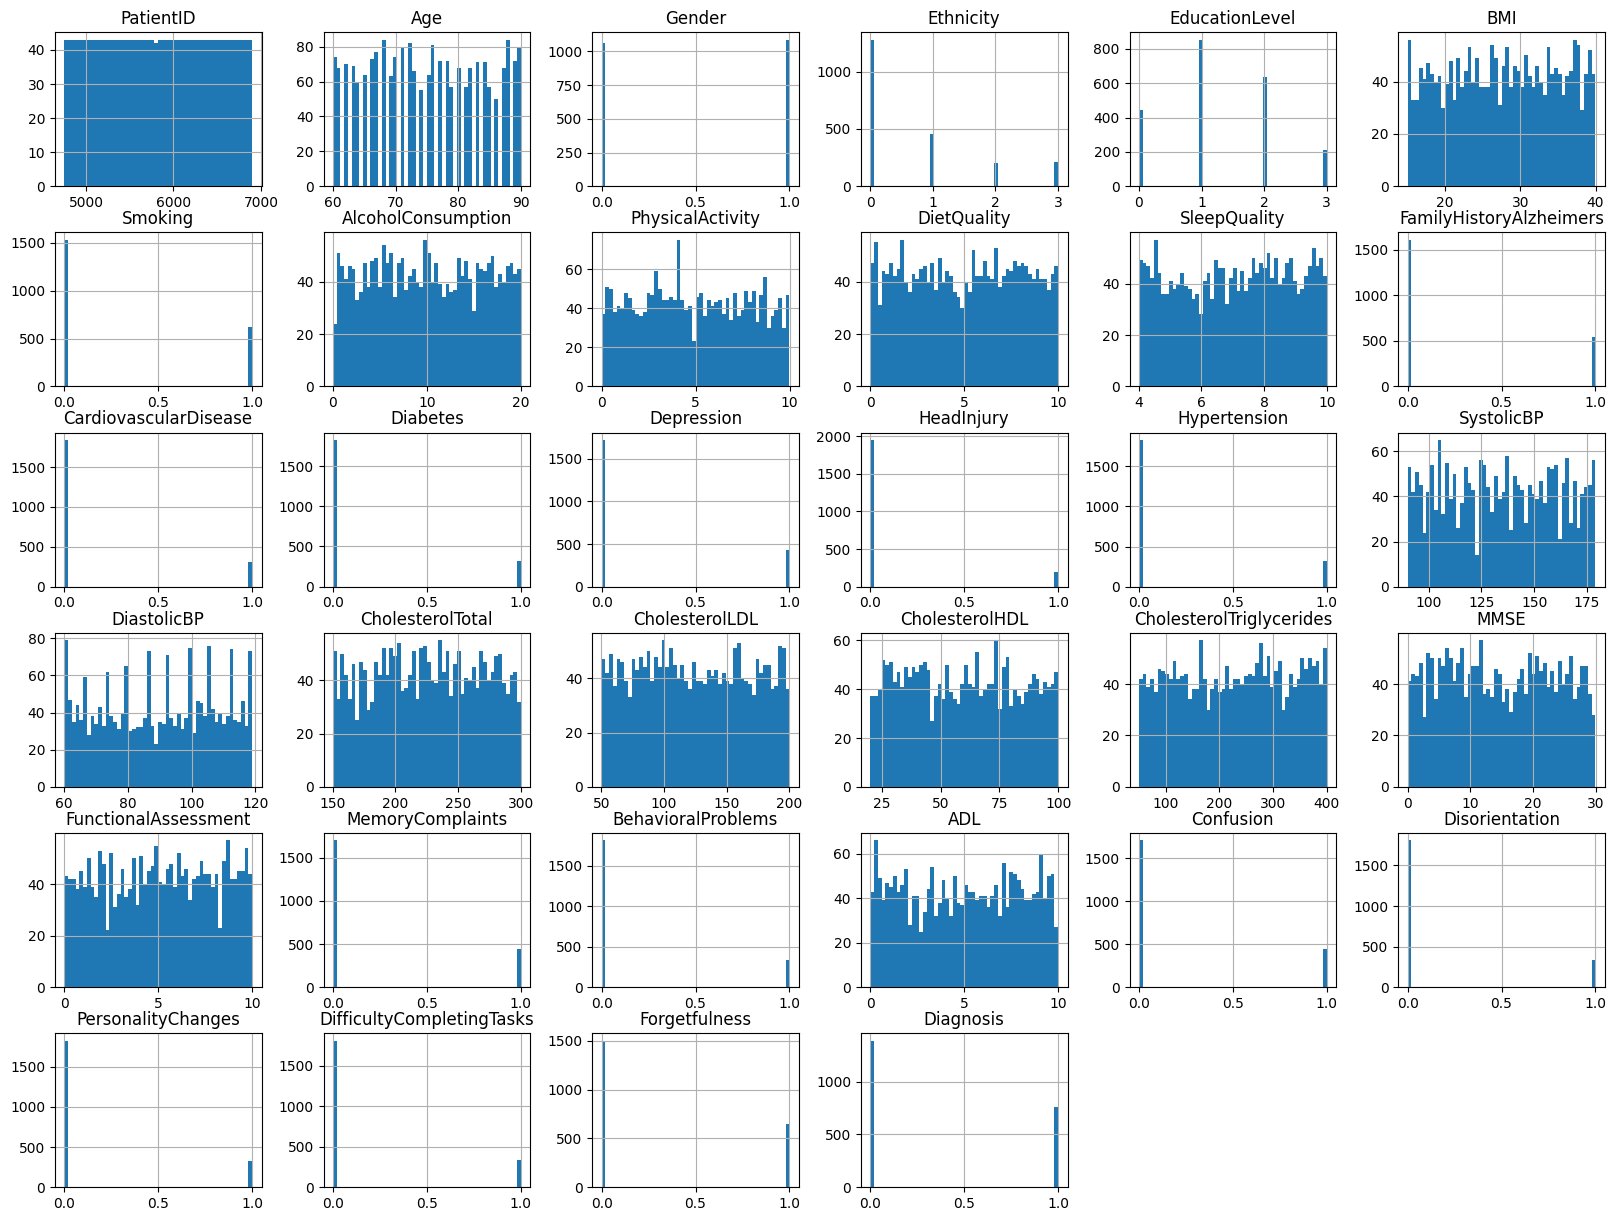

In [30]:
data = load_housing_csv('datasets/archive/')
data.head()
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize=(20,15))

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
def split_train_test(data_,test_ratio):
    np.random.seed(30)
    shuffled_indices = np.random.permutation(len(data_))
    test_set_size = int(len(data_) * test_ratio)
    test_indice = shuffled_indices[:test_set_size]
    train_indice = shuffled_indices[test_set_size:]
    return data_.iloc[train_indice], data_.iloc[test_indice]
    
train_set,test_set = split_train_test(data,0.2)

x = test_set.loc[:,'BMI']
y = test_set.loc[:,'ADL']
x_array = np.array(x)
x_array = x_array.reshape(-1,1)
y_array = np.array(y)

lr_model = LinearRegression()
lr_model.fit(x_array,y_array)

a = lr_model.coef_
b = lr_model.intercept_
print(a)
print(b)
x_new = np.array([24])
x_new = x_new.reshape(-1,1)

prediction = lr_model.predict(x_new)
print(prediction)

[-0.01747093]
5.239585711991444
[4.82028334]


评估模型表现

mse= 8.220692565558544
r2 = 0.001838981629659009


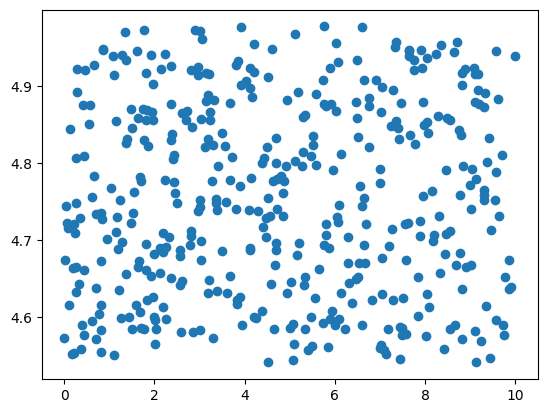

In [89]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
y_new = lr_model.predict(x_array)
plt.scatter(y,y_new)

mse = mean_squared_error(y,y_new)
r2 = r2_score(y,y_new)
print('mse=',mse)
print('r2 =',r2)